# Imports

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Задание 1.

Вариант - 1;

Задания - 1.1, 2.1, 3.1, 4.1;

## 1.1 

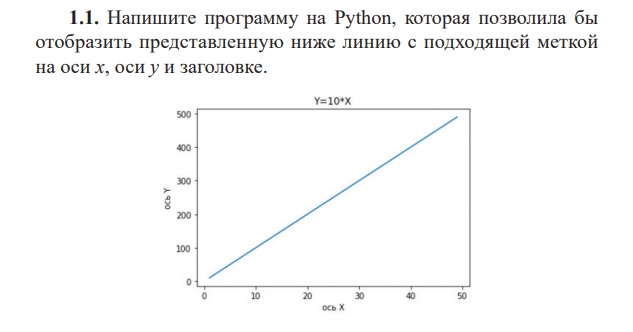

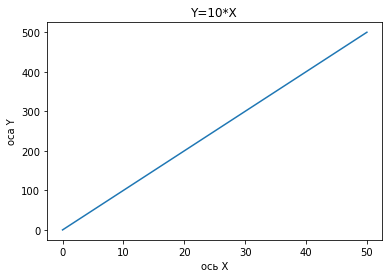

In [2]:
x = np.linspace(0, 50)
y = 10 * x 

plt.plot(x, y)
plt.xlabel('ось X')
plt.ylabel('оса Y')
plt.title('Y=10*X')
plt.show()

## 1.2

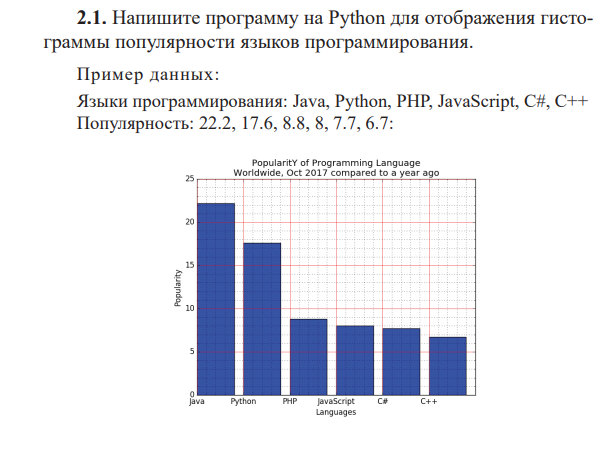

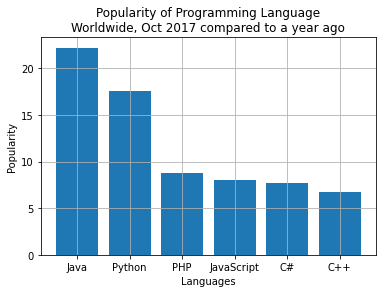

In [3]:
lang_to_popularity = {
    'Java': 22.2,
    'Python': 17.6,
    'PHP': 8.8,
    'JavaScript': 8,
    'C#': 7.7,
    'C++': 6.7
}

plt.bar(list(lang_to_popularity.keys()), list(lang_to_popularity.values()))
plt.grid()
plt.title(
    "Popularity of Programming Language"
    "\nWorldwide, Oct 2017 compared to a year ago"
)
plt.xlabel('Languages')
plt.ylabel('Popularity')
plt.show()

## 1.3 

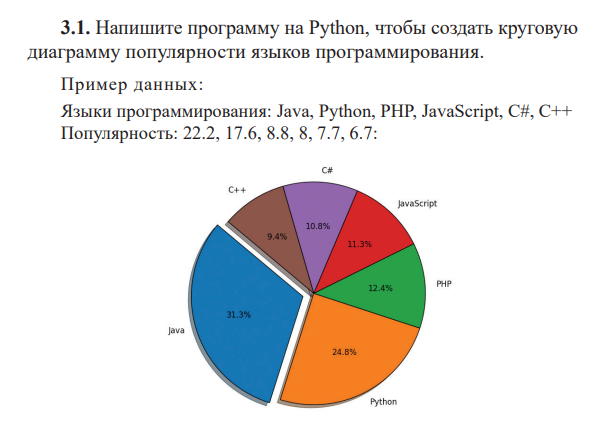

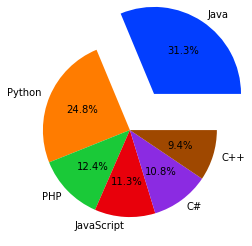

In [4]:
lang_to_popularity = {
    'Java': 22.2,
    'Python': 17.6,
    'PHP': 8.8,
    'JavaScript': 8,
    'C#': 7.7,
    'C++': 6.7
}

explode = [0.5, 0, 0, 0, 0, 0,]
palette_color=sns.color_palette('bright')

plt.pie(list(lang_to_popularity.values()), labels=list(lang_to_popularity.keys()), 
    explode=explode, colors=palette_color, autopct='%.1f%%')
plt.show()

## 4.1

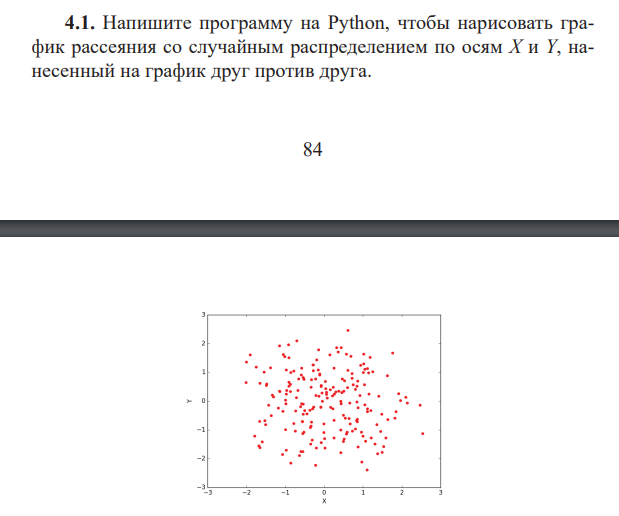

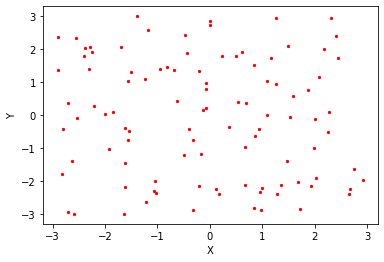

In [5]:
x = np.random.uniform(low=-3, high=3, size=100)
y = np.random.uniform(low=-3, high=3, size=100)

plt.scatter(x, y, c='r', s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Задание 2 
Провести анализ датасетов с помощью библиотеки 
Matplotlib, Pyplot:


1)	построить	несколько	графиков	на	одном	поле;
2)	построить	диаграммы	для	категориальных	данных;
3)	построить	столбчатые	и	круговые	диаграммы;
4)	реализовать	цветовую	сетку	данных;
5)	построить	3D-график.

**Вариант 1** - поиск по ключевому слову `ENTERTAINMENT`

In [6]:
data = pd.read_csv('./trending.csv', index_col=[0]).set_index('id')

In [22]:
data.head(3)

,original_title,original_language,release_date,popularity,vote_average,vote_count,media_type
id,,,,,,,
638974,Murder Mystery 2,English,2023-03-26,235.901,6.8,187,movie
677179,Creed III,English,2023-03-01,1537.879,7.2,561,movie
726759,Tetris,English,2023-03-15,66.661,7.7,100,movie


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16080 entries, 638974 to 82856
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     12060 non-null  object 
 1   original_language  16080 non-null  object 
 2   release_date       12060 non-null  object 
 3   popularity         16080 non-null  float64
 4   vote_average       16080 non-null  float64
 5   vote_count         16080 non-null  int64  
 6   media_type         16080 non-null  object 
 7   adult              16080 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 1020.7+ KB


In [8]:
cat_features = ['original_language', 'media_type', 'adult']

for feat in cat_features:
    print(f"for cat feat {feat} those are unique values: {data[feat].unique()}")

for cat feat original_language those are unique values: ['English' 'Korean' 'Spain' 'Chinese' 'Japanese']
for cat feat media_type those are unique values: ['movie' 'tv']
for cat feat adult those are unique values: [False]


Удалим фичу `adult`, так как она всегда **False**

In [9]:
data = data.drop(columns=['adult'])

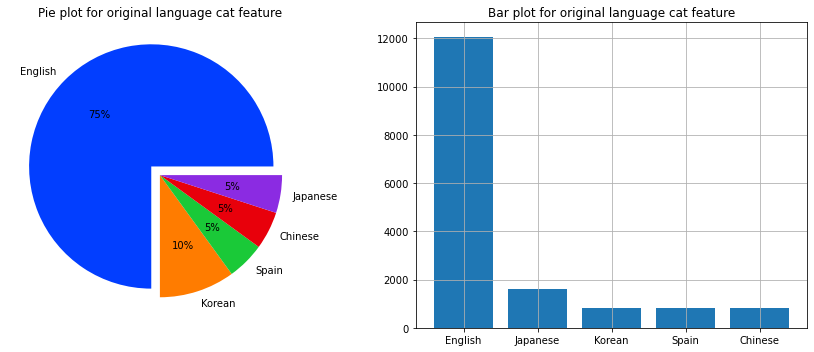

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

explode = [0.1, 0, 0, 0, 0]
palette_color=sns.color_palette('bright')

ax[0].pie(data['original_language'].value_counts().tolist(), labels=data['original_language'].unique().tolist(), 
    explode=explode, colors=palette_color, autopct='%.0f%%')
ax[0].set_title("Pie plot for original language cat feature")

ax[1].bar(data['original_language'].value_counts().index.to_list(), 
          data['original_language'].value_counts())

ax[1].set_title("Bar plot for original language cat feature")

plt.tight_layout()
plt.grid()
plt.show()

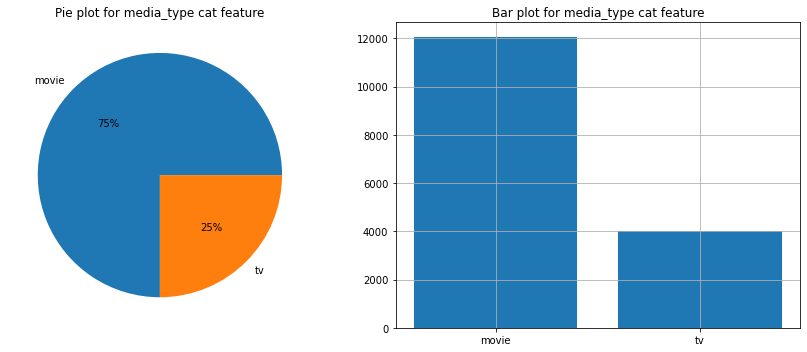

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].pie(data['media_type'].value_counts().tolist(), labels=data['media_type'].unique().tolist(), autopct='%.0f%%')
ax[0].set_title("Pie plot for media_type cat feature")

ax[1].bar(data['media_type'].value_counts().index.to_list(), 
          data['media_type'].value_counts())

ax[1].set_title("Bar plot for media_type cat feature")

plt.tight_layout()
plt.grid()
plt.show()

In [16]:
def plot_3d(data, x_col, y_col, z_col):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    x = data[x_col]
    y = data[y_col]
    z = data[z_col]

    ax.scatter(x, y, z)

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)

    plt.show()

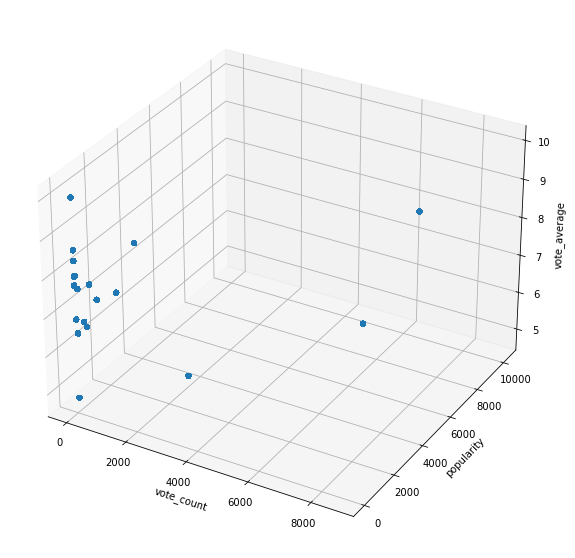

In [21]:
plot_3d(data, 'vote_count', 'popularity', 'vote_average')